### Git Setup, EDA, and Statistical Analysis - TASK-1

C:\Users\gagur\AppData\Local\Temp\ipykernel_2240\3814261658.py:13: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')


Data shape: (1000098, 52)

Data types:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                

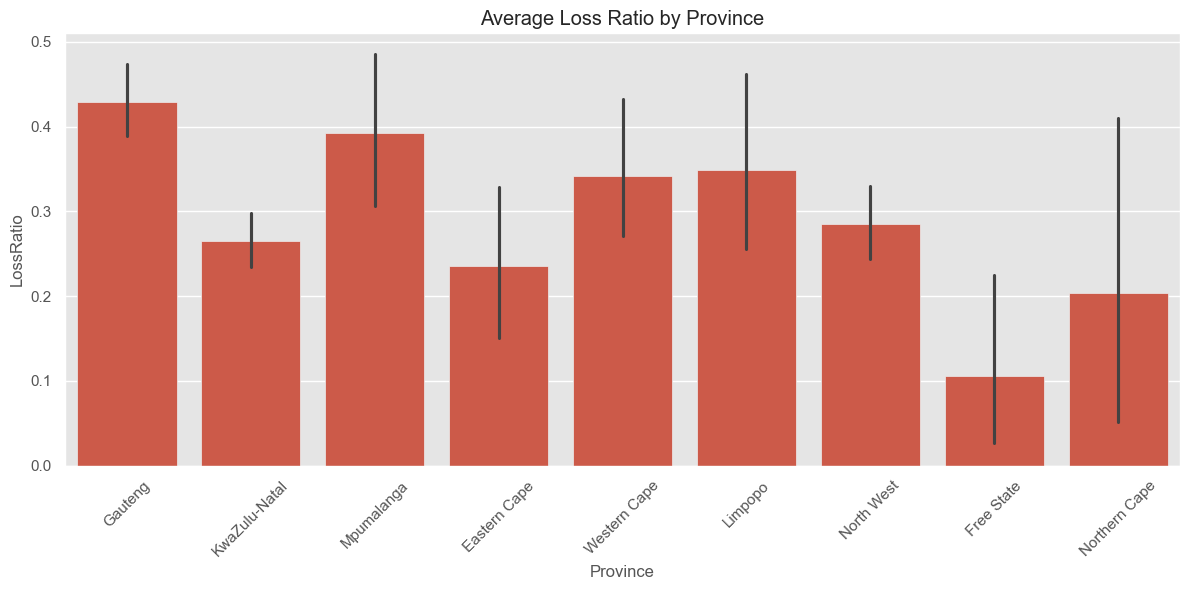

c:\Users\gagur\Videos\insurance-analytics\myenv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\gagur\Videos\insurance-analytics\myenv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


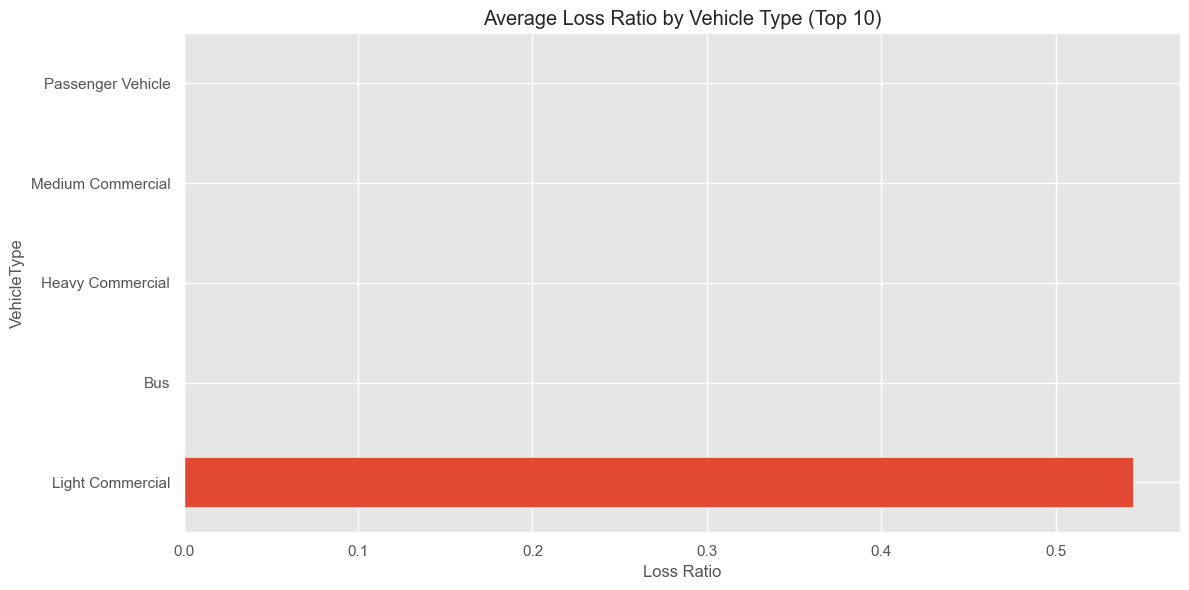

c:\Users\gagur\Videos\insurance-analytics\myenv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\gagur\Videos\insurance-analytics\myenv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


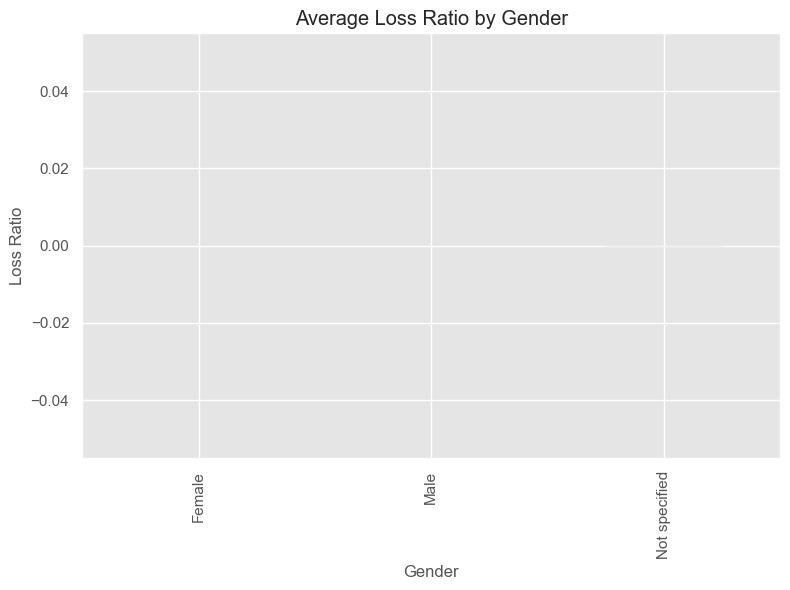

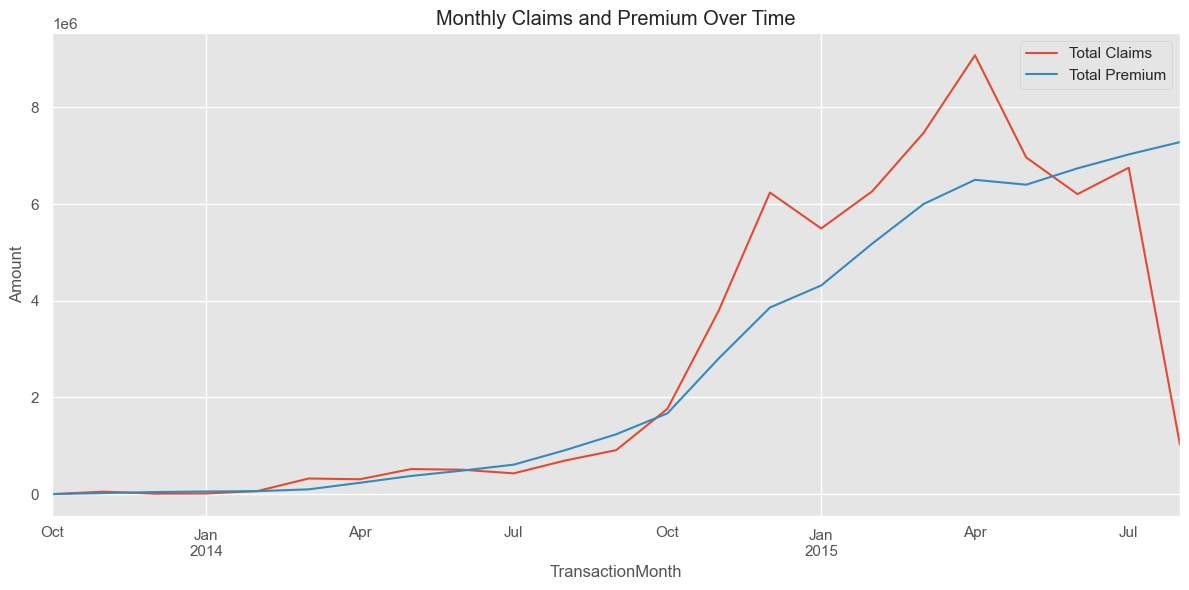

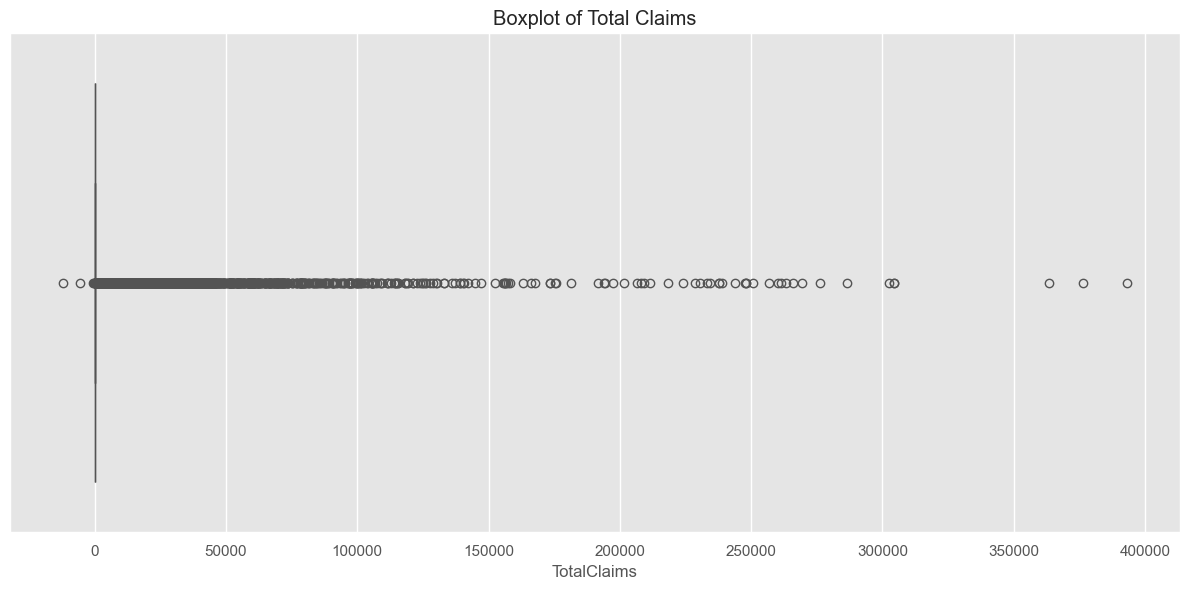

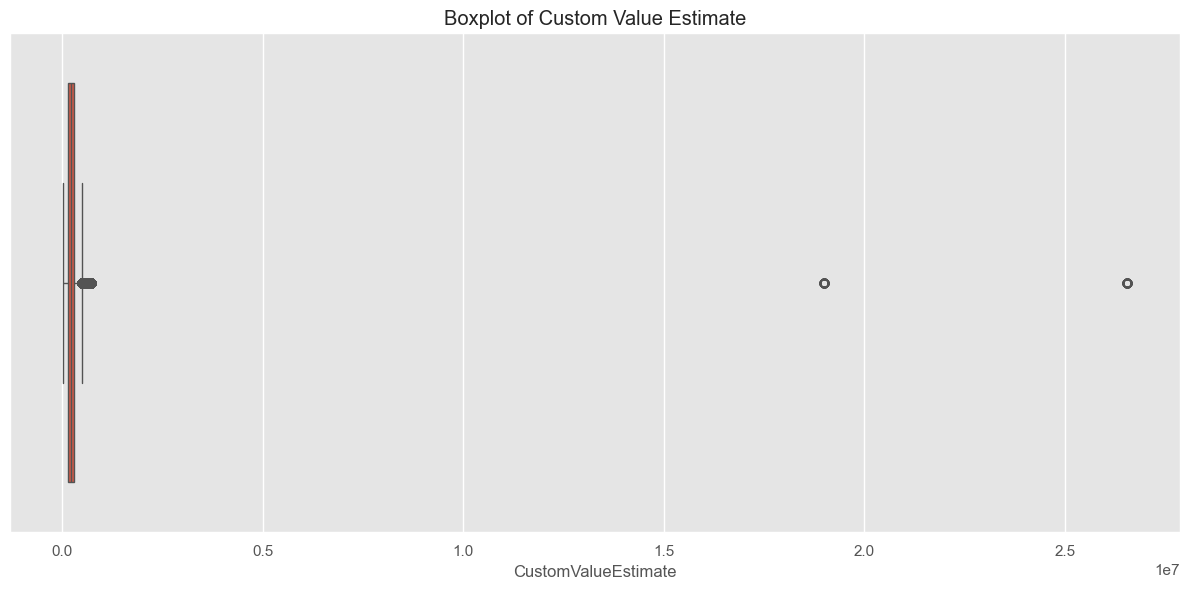

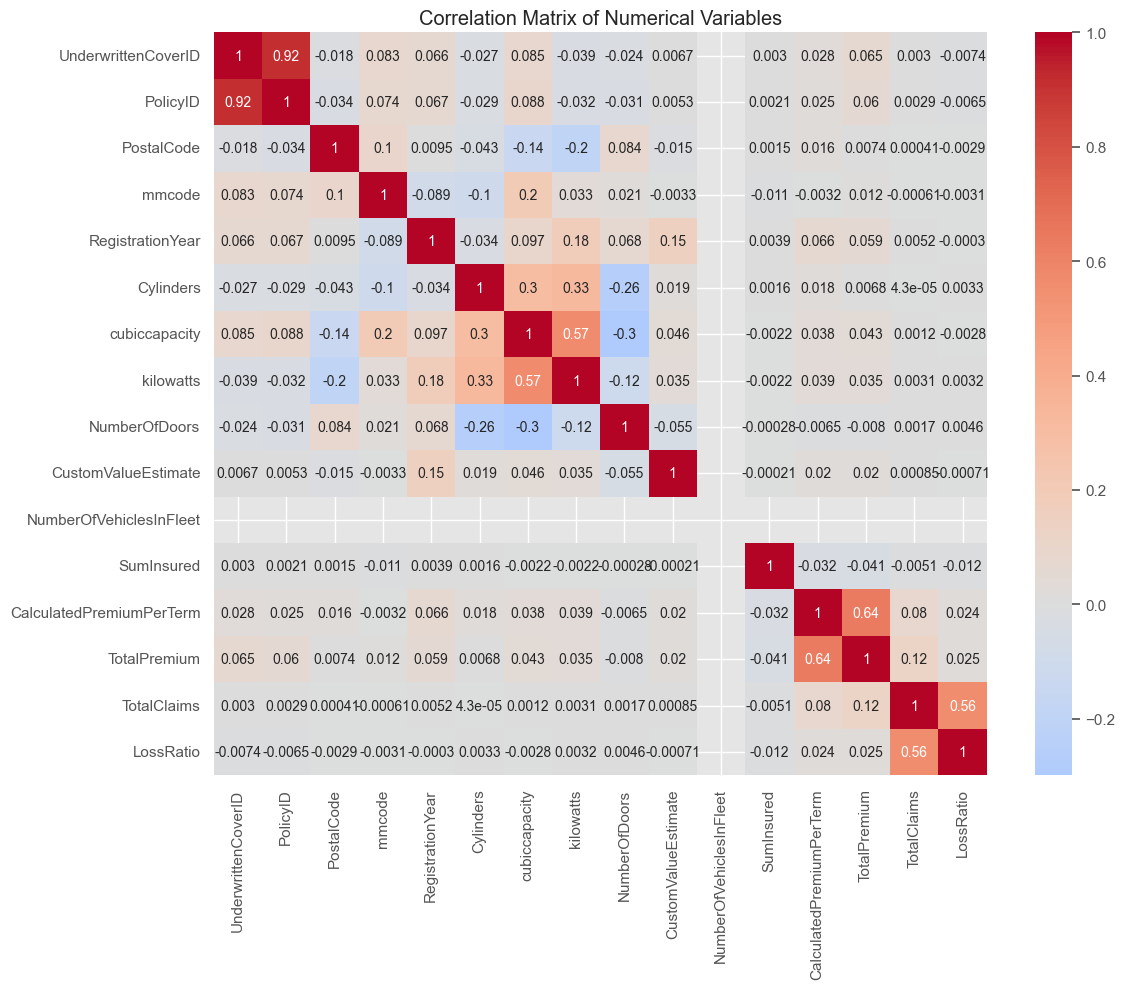

c:\Users\gagur\Videos\insurance-analytics\myenv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\gagur\Videos\insurance-analytics\myenv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


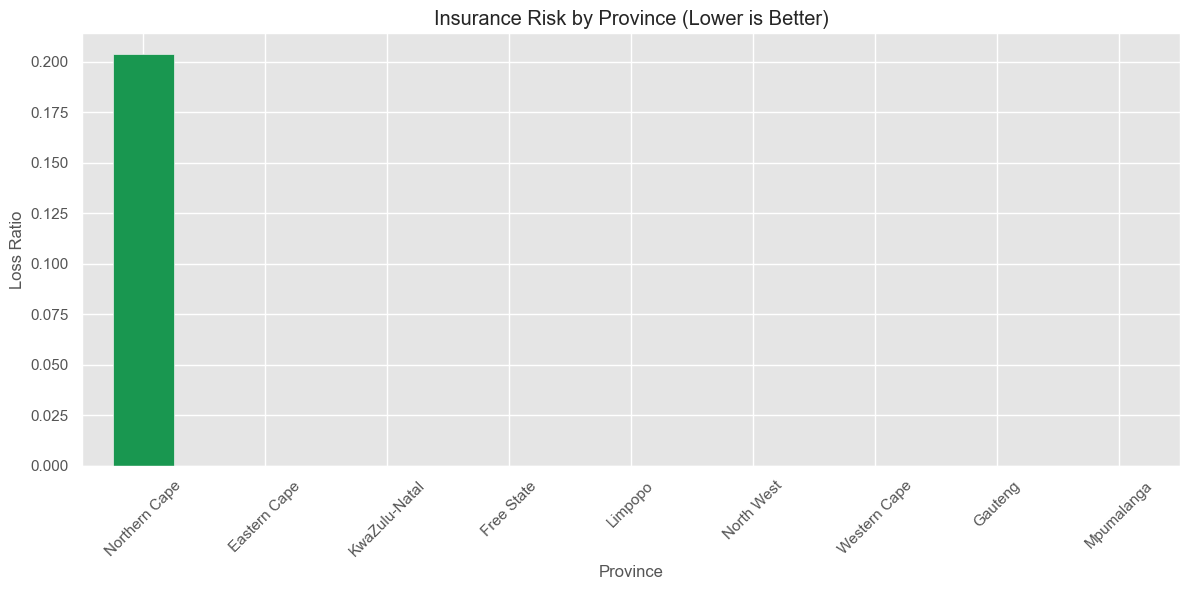

c:\Users\gagur\Videos\insurance-analytics\myenv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\gagur\Videos\insurance-analytics\myenv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


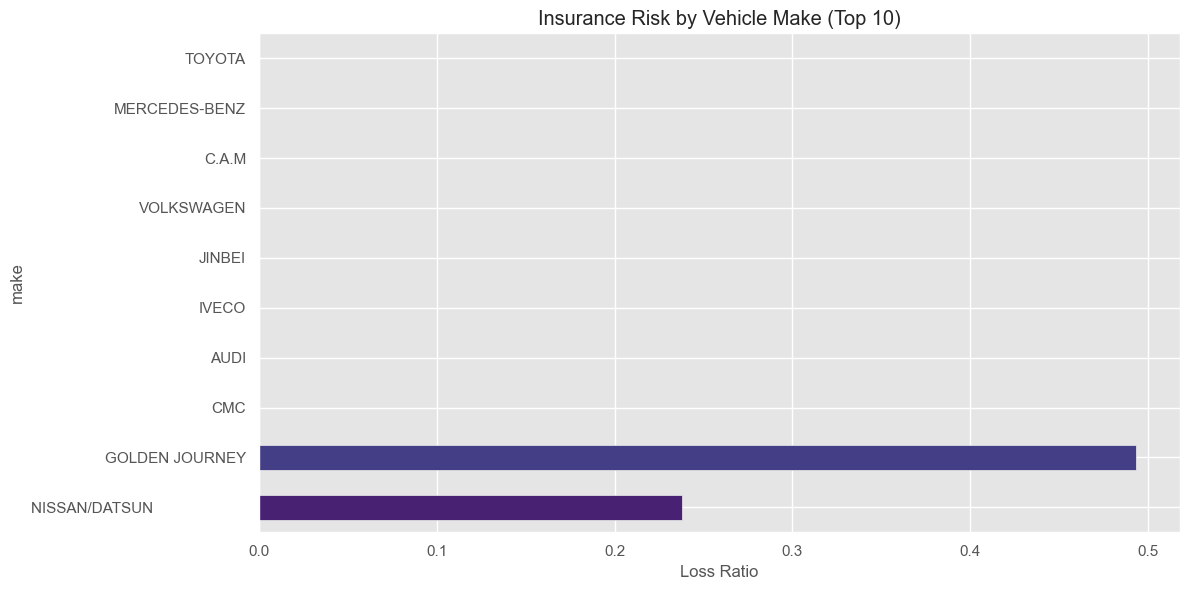

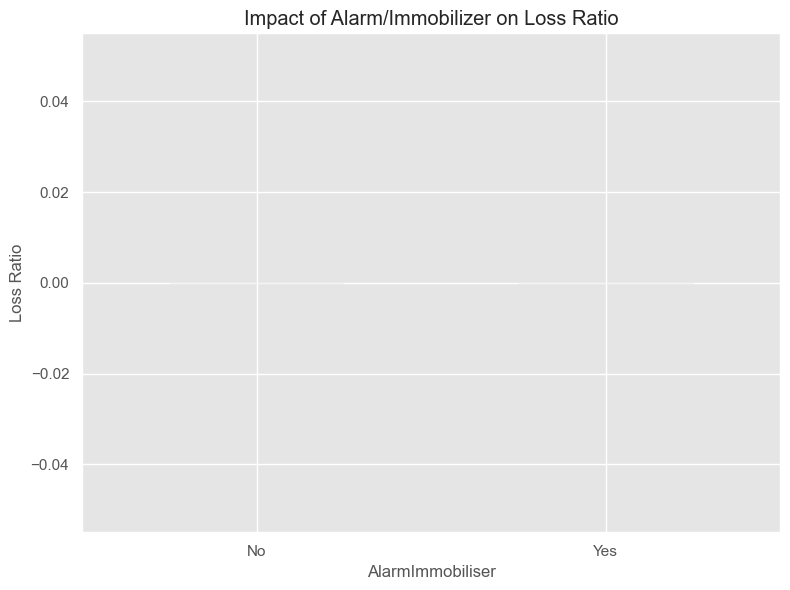

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for visualizations
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Load the data
df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')

# Data Understanding
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# Data Quality Assessment
print("\nMissing values:\n", df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive statistics for numerical columns:\n", df.describe())

# Calculate Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# 1. Loss Ratio Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='LossRatio', data=df, estimator=np.mean)
plt.title('Average Loss Ratio by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/loss_ratio_by_province.png')
plt.show()

# 2. Vehicle Type Analysis
top_10_vehicles = df['VehicleType'].value_counts().head(10).index
vehicle_loss = df[df['VehicleType'].isin(top_10_vehicles)].groupby('VehicleType')['LossRatio'].mean().sort_values()

plt.figure(figsize=(12, 6))
vehicle_loss.plot(kind='barh')
plt.title('Average Loss Ratio by Vehicle Type (Top 10)')
plt.xlabel('Loss Ratio')
plt.tight_layout()
plt.savefig('../reports/loss_ratio_by_vehicle.png')
plt.show()

# 3. Gender Analysis
gender_loss = df.groupby('Gender')['LossRatio'].mean()

plt.figure(figsize=(8, 6))
gender_loss.plot(kind='bar')
plt.title('Average Loss Ratio by Gender')
plt.ylabel('Loss Ratio')
plt.tight_layout()
plt.savefig('../reports/loss_ratio_by_gender.png')
plt.show()

# Temporal Trends
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly_claims = df.groupby('TransactionMonth')['TotalClaims'].sum()
monthly_premium = df.groupby('TransactionMonth')['TotalPremium'].sum()

plt.figure(figsize=(12, 6))
monthly_claims.plot(label='Total Claims')
monthly_premium.plot(label='Total Premium')
plt.title('Monthly Claims and Premium Over Time')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/monthly_trends.png')
plt.show()

# Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['TotalClaims'])
plt.title('Boxplot of Total Claims')
plt.tight_layout()
plt.savefig('../reports/claims_boxplot.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['CustomValueEstimate'])
plt.title('Boxplot of Custom Value Estimate')
plt.tight_layout()
plt.savefig('../reports/value_boxplot.png')
plt.show()

# Correlation Analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.savefig('../reports/correlation_matrix.png')
plt.show()

# Creative Visualization 1: Geographic Risk
province_risk = df.groupby('Province')['LossRatio'].mean().sort_values()

plt.figure(figsize=(12, 6))
province_risk.plot(kind='bar', color=sns.color_palette("RdYlGn_r", len(province_risk)))
plt.title('Insurance Risk by Province (Lower is Better)')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/province_risk.png')
plt.show()

# Creative Visualization 2: Vehicle Make Analysis
top_makes = df['make'].value_counts().head(10).index
make_risk = df[df['make'].isin(top_makes)].groupby('make')['LossRatio'].mean().sort_values()

plt.figure(figsize=(12, 6))
make_risk.plot(kind='barh', color=sns.color_palette("viridis", len(make_risk)))
plt.title('Insurance Risk by Vehicle Make (Top 10)')
plt.xlabel('Loss Ratio')
plt.tight_layout()
plt.savefig('../reports/make_risk.png')
plt.show()

# Creative Visualization 3: Alarm System Impact
alarm_impact = df.groupby('AlarmImmobiliser')['LossRatio'].mean()

plt.figure(figsize=(8, 6))
alarm_impact.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Impact of Alarm/Immobilizer on Loss Ratio')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../reports/alarm_impact.png')
plt.show()